# NYT Timerow Analysis at the example of Harro's paper.

This Notebook exemplifies the timerow analysis as contucted in:

van Lente, H., Spitters, C., & Peine, A. (2013). Comparing technological hype cycles: Towards a theory. Technological Forecasting and Social Change, 80(8), 1615–1628. https://doi.org/10.1016/j.techfore.2012.12.004

1. We load the library & define the search terms: "voice over IP", "internet telephony", "gene therapy", "superconductivity"
2. We run the search with using the NYT-API.
3. We filter duplicates, pivot by Year and plot the results.

As stated in the paper, the number of publications are no sufficient indicator for a technology hype or the slope of enlightment. In addition the authors suggest a qualitative analysis of article contents joint with interviews. Checking for linguistic differences before & after the peak didn't show anything interesting (see the other notebook). 

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from MyLib import NYT_timerow as myL
from pynytimes import NYTAPI
%load_ext autoreload
%autoreload 2

FileName="Soc_Exp"

API_key=myL.NYT_api_key()
nyt = NYTAPI(API_key, parse_dates=True)
myL.D(20)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


'display colwidth set to: 20'

In [ ]:
#Run a single query:
query="sustainable AI"
myL.runSerach(query,results=200,years=(1990,2023))

In [8]:
# define a list of serches.

SL="voice over IP", "internet telephony", "gene therapy", "superconductivity"
SL2=['"'+i.strip()+'"' for i in SL]

In [48]:
# This cell runs a search for the entire list (takes about 20 minutes)

for query in SL2:
    myL.runSerach(query,results=900,years=(1970,2016))

Current Time =  12:01:27
"voice over IP" - from 1970-01-01 00:00:00 till 2016-12-31 00:00:00.


C:\Users\mr\miniconda3\envs\PyMax\lib\site-packages\pynytimes\helpers\article_search.py:16: UserWarning: Asking for a lot of results, because of rate limits it can take a while.
  warnings.warn(


voiceoverIP 25
Current Time =  12:01:31
"internet telephony" - from 1970-01-01 00:00:00 till 2016-12-31 00:00:00.
internettelephony 205
Current Time =  12:06:28
"gene therapy" - from 1970-01-01 00:00:00 till 2016-12-31 00:00:00.
genetherapy 791
Current Time =  12:22:34
"superconductivity" - from 1970-01-01 00:00:00 till 2016-12-31 00:00:00.
superconductivity 378


In [37]:
# load the saved files & sample for months (M) or years (Y)

sample="Y"

filenames=myL.GiveFilenamesFromSearch(SL)

comp=myL.load_filenames(filenames,sample=sample)

Number of Json Files:  4
voiceoverIP 2023-08-10_NYtimes_voiceoverIP.json
2023-08-10_NYtimes_voiceoverIP.json - article count: 18 -- Data points: 17
internettelephony 2023-08-10_NYtimes_internettelephony.json
2023-08-10_NYtimes_internettelephony.json - article count: 174 -- Data points: 17
genetherapy 2023-08-10_NYtimes_genetherapy.json
2023-08-10_NYtimes_genetherapy.json - article count: 561 -- Data points: 36
superconductivity 2023-08-10_NYtimes_superconductivity.json
2023-08-10_NYtimes_superconductivity.json - article count: 260 -- Data points: 36


In [31]:
# Merge Internet Telephony & voice over IP
comp["VoIP"]=comp["voiceoverIP"]+comp["internettelephony"]
comp.drop(columns=["internettelephony","voiceoverIP"],inplace=True)

<AxesSubplot: xlabel='pub_date'>

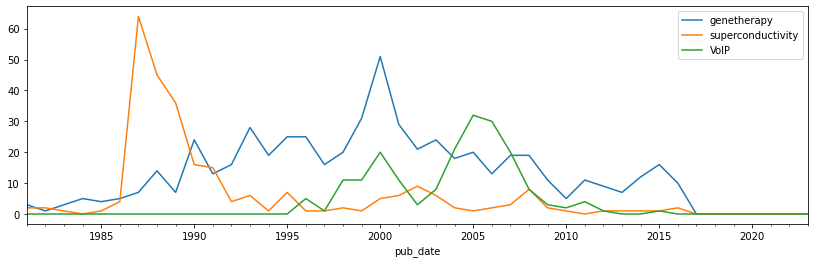

In [32]:
comp[comp.index.year>1980].plot(figsize=(14,4))

# Highlight single lines & mark peaks

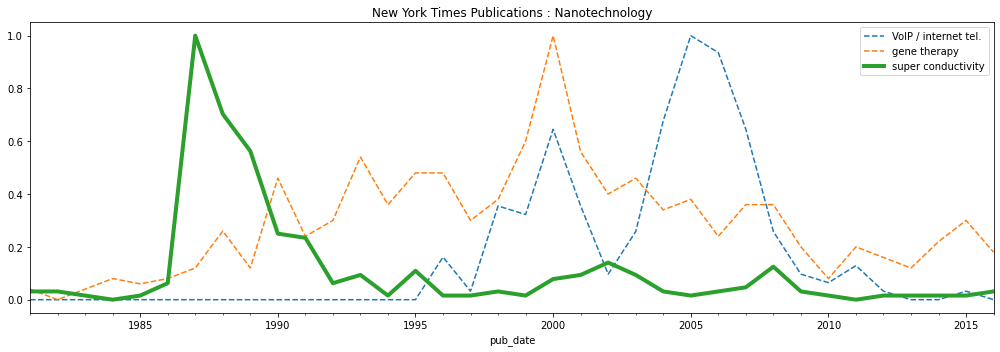

In [140]:
comp2=comp.apply(myL.normalize)
comp2[comp2.index.year>1980].iloc[:,1:].plot(legend=True,figsize=(14, 5),style="--")
# highlight one?
comp2[comp2.index.year>1980].iloc[:,0].plot(legend=True,figsize=(14, 5),lw=4, title="New York Times Publications : Nanotechnology")

plt.tight_layout(pad=1.08, h_pad=None, w_pad=None, rect=None)
plt.savefig(myL.Heute()+FileName+'hist_Y.pdf')


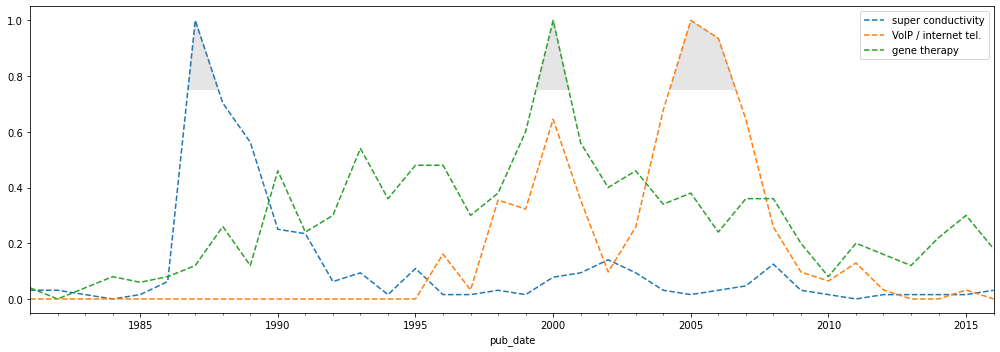

In [138]:
comp2=comp.apply(myL.normalize)

comp3=comp2[comp2.index.year>1980]
comp3.plot(legend=True,figsize=(14, 5),style="--")

for i in comp3.columns:
    plt.fill_between(comp3.index, comp3[i], color='black', alpha=0.1)
    plt.fill_between(comp3.index, 0.75, color='white', alpha=1)

plt.tight_layout(pad=1.08, h_pad=None, w_pad=None, rect=None)

plt.savefig(myL.Heute()+FileName+'hist_Y2.pdf')

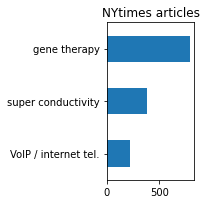

In [130]:
comp.sum().sort_values().plot.barh(title="NYtimes articles", figsize=(3, 3))
plt.tight_layout(pad=1.28, h_pad=None, w_pad=None, rect=None)
plt.savefig(myL.Heute()+FileName+'barH.pdf')

# Pre-/after-Peak

In [44]:
Timespots=["2000","2006","2010"]

def BeforeAfter(df,Timespots):
    A=df.loc[(df.pub_date > Timespots[0]) & (df.pub_date <= Timespots[1])]
    B=df.loc[(df.pub_date > Timespots[1]) & (df.pub_date <= Timespots[2])]
    return A,B

A,B=BeforeAfter(df_VoIP,Timespots)
